## Derivation

Newton's method (also called Newton-Raphson method) is used to find the roots of a real-valued function $f$ or even to optimize $f$ such that we find the min/max values of it. This is an iterative method that seeks to find the value of $x$ such that $f(x)=0$ or $\frac{df}{dx}=0$. Below we provide a simple derivation via Taylor Series. 

Let's write the Taylor seris of $f$ around $x_n$:
$$f(x_{n+1})=f(x_{n})+f'(x_{n})(x_{n+1}-x_{n})+\frac{f''(x_{n})}{2}(x_{n+1}-x_{n})^2+...$$.
For root finding, we ignore the higher order terms like $f''(x_n)$ so that we have:
$$f'(x_n)=\frac{f(x_{n+1})-f(x_{n})}{x_{n+1}-x_{n}}$$.
Since we are at $x_n$, the root must be at some $x_{n+1}$. Thus, $f(x_{n+1})=0$, so that:
$$f'(x_n)=\frac{0-f(x_{n})}{x_{n+1}-x_{n}}$$.
With some simple algebra we arrive at:
$$x_{n+1}=x_{n}-f(x_{n})/f'(x_n)$$.
So we start at $x_0$ and stop at some $x_{n+1}$ once the value converges. This is root finding method. In this note, I am not going to go deep.

Now let's apply the Taylor series again around $x_n$ by consider up to order $f''(x_n)$:
$$f(x_{n+1})=f(x_{n})+f'(x_{n})(x_{n+1}-x_{n})+\frac{f''(x_{n})}{2}(x_{n+1}-x_{n})^2$$
We can differentiate around and ignore higher order terms:
$$f''(x_{n+1})=f'(x_{n})+f''(x_{n})(x_{n+1}-x_{n})+f'''(x_{n})(x_{n+1}-x_{n}).$$

Recall that to find the min/max, we need to set the first derivative to zero and this means $f'(x_{n+1})=0$. Thus, now we have:
$$0=f'(x_{n})+f''(x_{n})(x_{n+1}-x_{n})$$
By some simple algebra we arrive at the following iterative method:
$$x_{n+1}=x_{n}-f'(x_{n})/f''(x_n).$$.

## Numerical Examples and Code

We consider the following function $f(x)=(1-x)^2+(x^2-1)^2$ on the domain $\mathcal{D} = [-1, 1]$.

### The graph of f

Let us visualize this function first so that we can see where the roots and optimal values are.

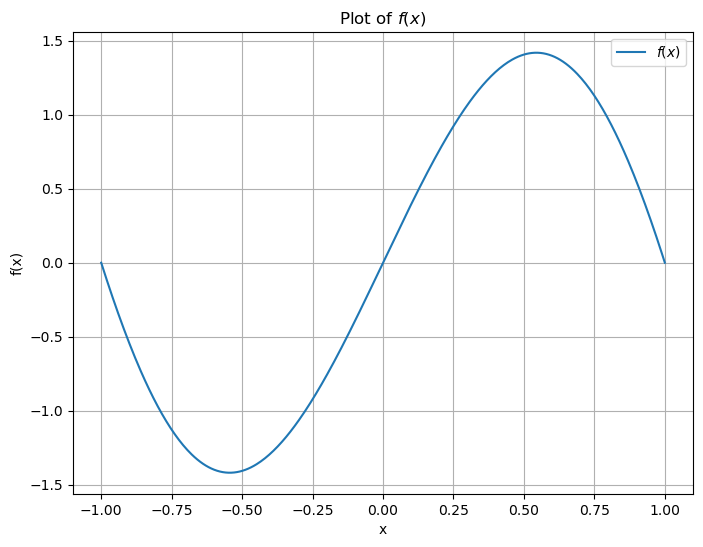

In [220]:
import numpy as np
import matplotlib.pyplot as plt

def f(x): return x**5-5*x**3+4*x

x = np.linspace(-1, 1, 400)
fx = f(x)

# Let's create a plot
plt.figure(figsize=(8, 6))
plt.plot(x, fx, label=r"$f(x)$")
plt.title("Plot of $f(x)$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

### The roots and optimal values of f

From the graph is is clear that $x=-1, 0, 1$ are the roots of $f$. The minimum value occurs somewhere between -0.75 and -0.5 while the maximum value occurs between 0.25 and 0.75.

Let's write a simple program in py to verify that. In Newton's method we need $f'(x)= 5 x^4 -15 x^2+4$ and $f''(x)= 20 x^3 -30 x$. Note that I am note imposing some restrictions like tolerance, etc.

#### Programs in Python

In [221]:
class NewtonMethod:
    def __init__(self, D):
        # D is the interval for which we are searching for the roots or optima
        self.D = D

    def f(self, x):
        return x**5 - 5*x**3 + 4*x
    def df(self, x):
        return 5*x**4 - 15*x**2 + 4
    def ddf(self, x):
        return 20*x**3 - 30*x
    
    def newton_root(self, x0, f, df, n_iter=100):
        a, b = self.D  # the interval for which we are searching for the roots
        x = x0  # initial value
        for i in range(n_iter):
            x -= f(x) / df(x)
            # make sure x stays within the interval [a, b]
            if x < a:
                x = a
            elif x > b:
                x = b
        return x

    # Local Min/Max Newton optimizer
    def newton_optimal(self, x0, n_iter=100):
        return self.newton_root(x0, self.df, self.ddf, n_iter)

#### Numerical results

In [222]:
# Define the interval for root finding and optimization
D = [-1, 1]

# Create an instance of the NewtonMethod class
newton = NewtonMethod(D)

# Find roots using newton_root
x01, x02, x03 = 0.7, 0.04, 0.5
root1 = newton.newton_root(x01, newton.f, newton.df, n_iter=100)
root2 = newton.newton_root(x02, newton.f, newton.df, n_iter=100)
root3 = newton.newton_root(x03, newton.f, newton.df, n_iter=100)

# Find local minimum and maximum using newton_optimal
x0_min = -0.5
x0_max = 0.5
local_min = newton.newton_optimal(x0_min, n_iter=100)
local_max = newton.newton_optimal(x0_max, n_iter=100)

In [223]:
(root1, root2, root3)

(1.0, 0.0, -1.0)

In [218]:
(local_min, local_max)

(-0.543912255902338, 0.543912255902338)

## Conclusion

The method can be improved by introducing tolerance or some stopping criteria to ensure convergance. We can also ensure that we do not encounter division by zero be imposing some tolerance on the first derivative. Some methods like secant method can also be used.